In [108]:
import random
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

In [109]:
def gera_varias_inclinacoes():

    dados = []
    quantidade_de_dados = 100

    inclinacao_1 = 1
    inclinacao_2 = 0.5
    inclinacao_3 = 0.3
    intercepto = 0

    for numero in range(quantidade_de_dados):
        ponto = []
        y_1 = inclinacao_1 * numero + intercepto
        ponto.append(y_1)
        y_2 = inclinacao_2 * numero + intercepto
        ponto.append(y_2)
        y_3 = inclinacao_3 * numero + intercepto
        ponto.append(y_3)

        dados.append(ponto)

    dados = pd.DataFrame(dados, columns = ['y_1', 'y_2', 'y_3'])

    return dados

def gera_varios_interceptos():

    dados = []
    quantidade_de_dados = 100

    inclinacao = 0.5
    intercepto_1 = 0
    intercepto_2 = 10
    intercepto_3 = 20
    
    for numero in range(quantidade_de_dados):
        ponto = []
        y_1 = inclinacao * numero + intercepto_1
        ponto.append(y_1)
        y_2 = inclinacao * numero + intercepto_2
        ponto.append(y_2)
        y_3 = inclinacao * numero + intercepto_3
        ponto.append(y_3)

        dados.append(ponto)

    dados = pd.DataFrame(dados, columns = ['y_1', 'y_2', 'y_3'])

    return dados

def gera_dados_com_erro():

    dados = []
    quantidade_de_dados = 100

    inclinacao = 0.5
    intercepto = 10

    for numero in range(quantidade_de_dados):
        ponto = []
        y = inclinacao * numero + intercepto
        y += random.randint(-5, 5)
        ponto.append(numero)
        ponto.append(y)

        dados.append(ponto)

    dados = pd.DataFrame(dados, columns = ['x', 'y'])
    dados.reset_index(inplace = True, drop = True)

    return dados

In [110]:
def gera_grafico_triplo(dados):
    fig, ax = plt.subplots(figsize=(12, 10))

    y_1 = dados['y_1']
    y_2 = dados['y_2']
    y_3 = dados['y_3']

    ax.plot(y_1, color='blue')
    ax.plot(y_2, color='green')
    ax.plot(y_3, color='red')

    plt.xlim([0,100])
    plt.ylim([0,100])

    plt.show()

def gera_grafico_simples(dados):
    fig, ax = plt.subplots(figsize=(12, 10))

    ax.scatter(x = dados.index, y = dados['y'], color='blue')
    
    plt.xlim([0,100])
    plt.ylim([0,100])

    plt.show()

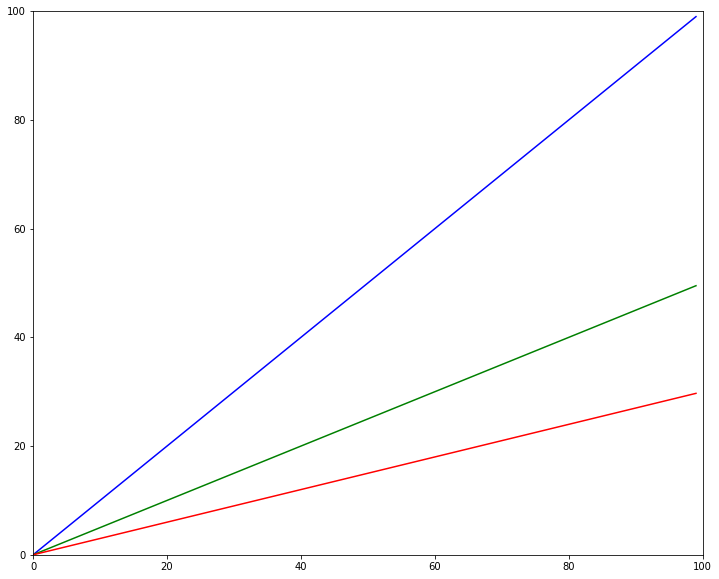

In [111]:
dados = gera_varias_inclinacoes()

gera_grafico_triplo(dados)

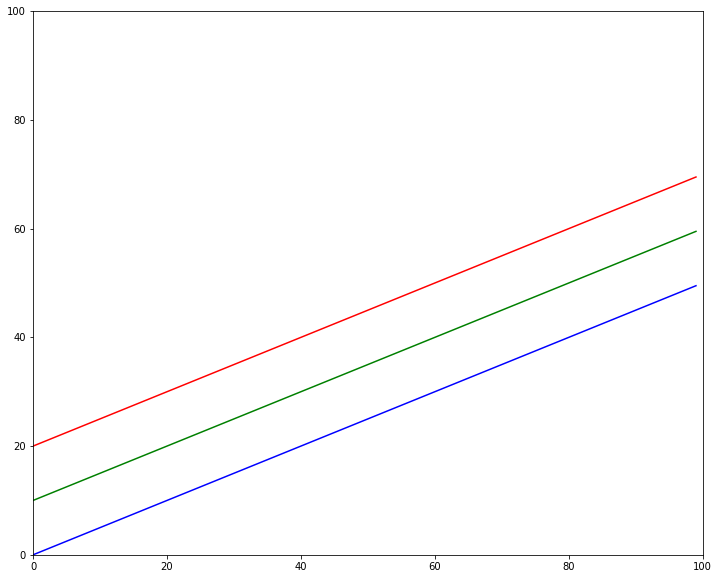

In [112]:
dados = gera_varios_interceptos()

gera_grafico_triplo(dados)

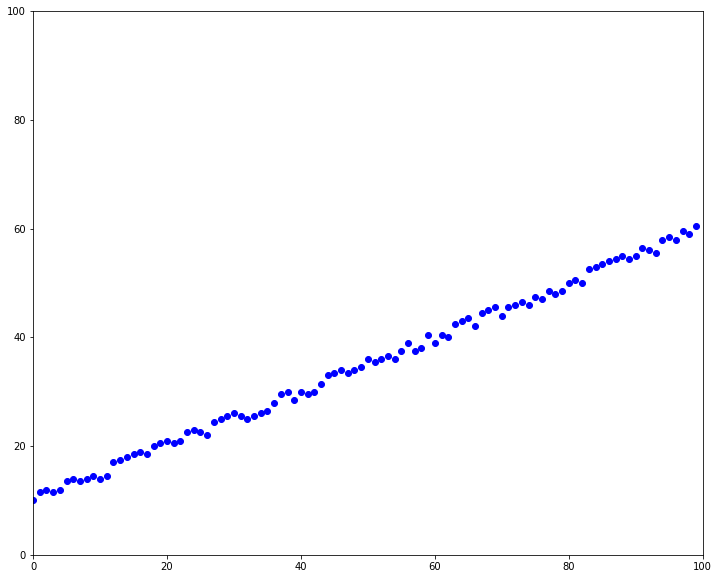

In [113]:
dados = gera_dados_com_erro()

gera_grafico_simples(dados)

In [114]:
X = dados['x'].values.reshape(-1, 1)
y = dados['y'].values.reshape(-1, 1)

x_treino, x_teste, y_treino, y_teste = train_test_split(X, y, test_size = 0.3)

In [115]:
modelo_linear = LinearRegression()
modelo_linear.fit(x_treino, y_treino)

coeficiente = modelo_linear.coef_
intercepto = modelo_linear.intercept_

print(f'Coeficiente: {coeficiente}\nIntercepto: {intercepto}')

Coeficiente: [[0.49873823]]
Intercepto: [10.27553564]


In [116]:
predicao = modelo_linear.predict(x_teste)
MSE = mean_squared_error(y_teste, predicao)
MAE = mean_absolute_error(y_teste, predicao)

print(f'Mean squared error: {MSE}\nMean absolute error: {MAE}')

Mean squared error: 0.6700172730634553
Mean absolute error: 0.7242045020365686


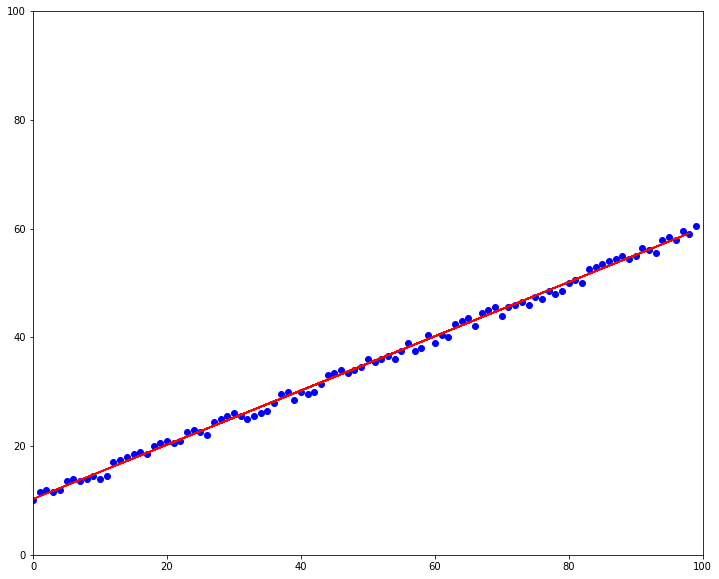

In [117]:
def gera_grafico_duplo(dados, x_teste, predicao):

    fig, ax = plt.subplots(figsize=(12, 10))

    ax.scatter(x = dados['x'], y = dados['y'], color = 'blue')
    plt.plot(x_teste, predicao, color = 'red')

    plt.xlim([0,100])
    plt.ylim([0,100])

    plt.show()

gera_grafico_duplo(dados, x_teste, predicao)